### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv(r'C:\Users\agnek\coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [4]:
# General overview of data counts and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender

Given that there is no participant ID associated with each scenario, I will infer that the 74 duplicate rows likely represent the same scenario selected by multiple respondents. Consequently, I am opting not to remove these duplicate rows. 

In [5]:
#Count null values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
# Investigatin car column values
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [7]:
# Creating a data frame with missing values for the Bar column
age_dist= data[data['Bar'].isnull()]
age_dist.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1


In [8]:
#Checking which age group has most missing values in the "Bar" column. 
age_dist['age'].value_counts()

41        28
31        27
36        22
50plus    12
26        12
21         6
Name: age, dtype: int64

In [9]:
#Filtering on top 3 age groups 
mid_life = data[(data['age'] == '41') | (data['age'] == '31') | (data['age'] == '36')]
mid_life['Bar'].value_counts()

less1    1648
never    1628
1~3       792
4~8       241
gt8        65
Name: Bar, dtype: int64

In [10]:
# Creating a data frame with missing values for the Coffee House column
CHdist= data[data['CoffeeHouse'].isnull()]
CHdist.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0


In [11]:
#Checking which age group has most missing values in the "Coffee House" column. 
age_dist['age'].value_counts()
CHdist['age'].value_counts()

26        122
36         44
31         27
50plus     12
41          6
21          6
Name: age, dtype: int64

In [12]:
#Filtering on the age groups '26'
age26=data[data['age'] == '26']
age26['CoffeeHouse'].value_counts()

1~3      717
less1    700
never    520
gt8      346
4~8      154
Name: CoffeeHouse, dtype: int64

In [13]:
# Applying same analysis process for carry away

CAway= data[data['CarryAway'].isnull()]
CAway['age'].value_counts()

21         50
50plus     34
26         34
below21    21
41          6
31          6
Name: age, dtype: int64

In [14]:
# Looking up the most common answer for ages 21 & 26
age21_26 = data[(data['age'] == '21') | (data['age'] == '26')]
age21_26['CarryAway'].value_counts()

1~3      2284
4~8      1604
gt8       601
less1     595
never      44
Name: CarryAway, dtype: int64

In [15]:
# looking up most frequent age groups for Restaurats Less than 20
RLess20= data[data['RestaurantLessThan20'].isnull()]
RLess20['age'].value_counts()

31        50
21        50
50plus    12
26        12
41         6
Name: age, dtype: int64

In [16]:
# Filtering for seleted age groups to determine the most common answer
rest21_31 = data[(data['age'] == '21') | (data['age'] == '31')]
rest21_31['RestaurantLessThan20'].value_counts()

1~3      1838
4~8      1490
less1     747
gt8       407
never     110
Name: RestaurantLessThan20, dtype: int64

In [17]:
# Applying the same process to an expensive restaurant data

R20_50= data[data['Restaurant20To50'].isnull()]
R20_50['age'].value_counts()

31         49
50plus     34
26         28
21         28
below21    22
46         22
41          6
Name: age, dtype: int64

In [18]:
#Filtering for age groups of interest

rest31_50 = data[(data['age'] == '50plus') | (data['age'] == '31')]
rest31_50['Restaurant20To50'].value_counts()

less1    2055
1~3       893
never     461
4~8       242
gt8        93
Name: Restaurant20To50, dtype: int64

#### 3. Decide what to do about your missing data -- drop, replace, other...

### Conclusion

Car: column has a high percentage of missing values and imputation or filling these missing values is not feasible or meaningful. Below are summary statistics for the Car column. 

Scooter and motorcycle                      22

Mazda5                                      22

do not drive                                22

crossover                                   21

Car that is too old to install Onstar :D    21


Bar: To validate my imputation strategy, I analyzed the missing values segmented by the respondents' age group. The investigation revealed that the majority of the missing data pertained to ages between 31 and 41. Within this age bracket, the most frequent responses were "never" (n=1628) and "less1" (n=1648). Consequently, I selected "less1" as the replacement value for the null entries.

I applied the same method to replace all other missing values.

CoffeeHouse:1-3

Carry away:1-3

RestaurantLessThan20:1-3

Restaurant20To50:less1

In [19]:
# Drop the 'car' column
data = data.drop('car', axis=1)

In [20]:
# Doublechecking that the Car column has been dropped
column_list = data.columns.tolist()
print(column_list)

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [21]:
#Replacing all missing values with less1 in Bar column
data['Bar'] = data['Bar'].fillna('less1')

# Doublechecking that all missing values have been filled in
data['Bar'].value_counts()

never    5197
less1    3589
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [22]:
#Replacing all missing values with 1-3 in CoffeeHouse column
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('1~3')

# Doublechecking that all missing values have been filled in
data['CoffeeHouse'].value_counts()

1~3      3442
less1    3385
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [23]:
#Replacing all missing values with 1-3 in CarryAway column
data['CarryAway'] = data['CarryAway'].fillna('1~3')

# Doublechecking that all missing values have been filled in
data['CarryAway'].value_counts()

1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [24]:
#Replacing all missing values with 1-3 in RestaurantLessThan20 column
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')

# Doublechecking that all missing values have been filled in
data['RestaurantLessThan20'].value_counts()

1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [25]:
#Replacing all missing values with 1-3 in Restaurant20To50 column
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')

# Doublechecking that all missing values have been filled in
data['Restaurant20To50'].value_counts()

less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [26]:
#Count null values again
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### 4. What proportion of the total observations chose to accept the coupon? 



In [27]:
# Getting counts for 1-accpted and 0-did not accept in the Y column
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

56.8% of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

In [28]:
# Getting coupon count by the type of the coupon
coupon_counts = data['coupon'].value_counts().reset_index()
coupon_counts.head()

,index,coupon
0,Coffee House,3996
1,Restaurant(<20),2786
2,Carry out & Take away,2393
3,Bar,2017
4,Restaurant(20-50),1492


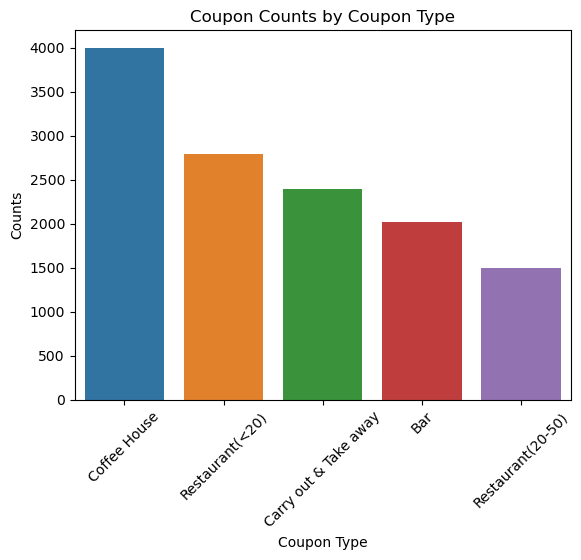

In [29]:
# Creating a bar plot
sns.barplot(x='index',y='coupon', data=coupon_counts)

# Add labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Counts')
plt.title('Coupon Counts by Coupon Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [30]:
data['temperature'].value_counts().reset_index()

,index,temperature
0,80,6528
1,55,3840
2,30,2316


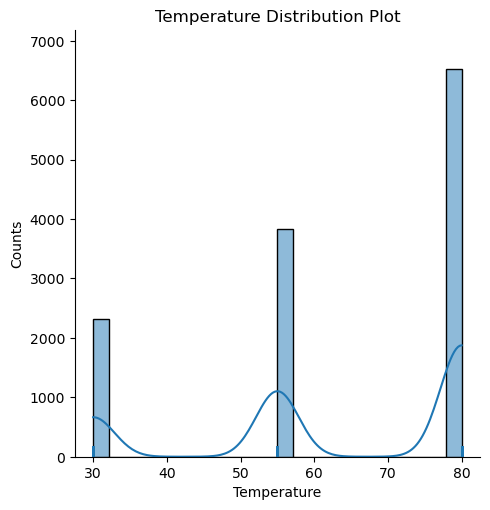

In [31]:
# Creating a histogram to examine the distribution oftemperatures.

sns.displot(data['temperature'], kde=True, rug=True)

# Add title and labels
plt.title('Temperature Distribution Plot')
plt.xlabel('Temperature')
plt.ylabel('Counts')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
#Filtering and creating a new data frame for bar coupons only

bar_coupons= data[data['coupon'] == 'Bar']
bar_coupons.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0


#### 2. What proportion of bar coupons were accepted?


In [33]:
# Getting counts for 1-accpted and 0-did not accept in the Y column
y_column=bar_coupons['Y'].value_counts().reset_index()
y_column.head(2)

,index,Y
0,0,1190
1,1,827


41% of the total observations chose to accept the bar coupon

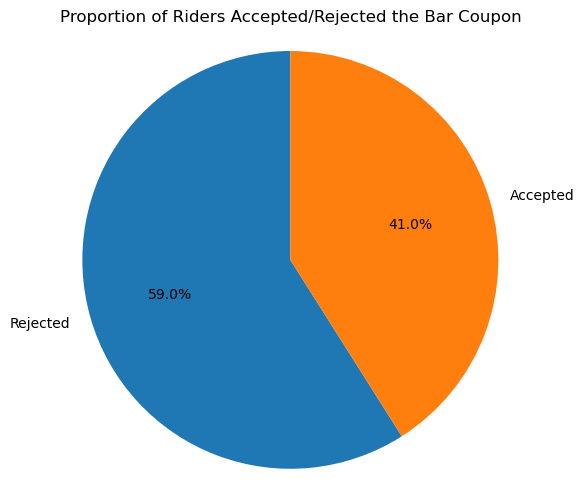

In [34]:
# Data
labels = ['Rejected', 'Accepted']
sizes = [1190, 827]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title of the pie chart
plt.title('Proportion of Riders Accepted/Rejected the Bar Coupon')

# Display the pie chart
plt.show()

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
# Mapping values to populate a new frequency column

frequency_mapping = {
    'never': 'less3', #3 or fewer times
    'less1': 'less3',
    '1~3': 'less3',
    '4~8': '3plus',  # More than 3 times
    'gt8': '3plus'
}

# Use map function to apply the mapping and create the new column
bar_coupons['frequency'] = bar_coupons['Bar'].map(frequency_mapping)

# Display the updated DataFrame
bar_coupons.head(3)

C:\Users\agnek\AppData\Local\Temp\ipykernel_6292\1264692419.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['frequency'] = bar_coupons['Bar'].map(frequency_mapping)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,frequency
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,less3
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,less3
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,less3


In [36]:
# Calculating acceptance rates for selected columns 
selected_columns = bar_coupons[['frequency', 'Y']]
grouped = selected_columns.groupby(['frequency', 'Y']).value_counts()

# Display the result
grouped.head()

frequency  Y
3plus      0      46
           1     153
less3      0    1144
           1     674
dtype: int64

Interestingly, the acceptance rate for individuals who visit the bar more than three times a month is 4.4 times lower than for those who visit the bar three or fewer times a month. This discrepancy suggests that the coupon might have functioned as both an incentive and a reminder for the less frequent bar visitors. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Mapping values to populate a new frequency2 column

frequency_mapping2 = {
    'never': 'less1', #one or less
    'less1': 'less1',
    '1~3': '1plus',
    '4~8': '1plus',
    'gt8': '1plus'  # more than once
}

# Use map function to apply the mapping and create the new column
bar_coupons['frequency2'] = bar_coupons['Bar'].map(frequency_mapping2)

# Display the updated DataFrame
bar_coupons.head(3)

C:\Users\agnek\AppData\Local\Temp\ipykernel_6292\577414784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['frequency2'] = bar_coupons['Bar'].map(frequency_mapping2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,frequency,frequency2
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,less3,less1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,1,0,1,less3,less1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,1,0,1,0,less3,less1


In [38]:
#Reviewing age groups and their distribution
bar_coupons['age'].value_counts()



21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64

In [39]:
# Setting up the filter for age under 25

under_25= bar_coupons[(bar_coupons['age'] == 'below21') | (bar_coupons['age'] == '21') & (bar_coupons['frequency2'] == '1plus')]
under_25['Y'].value_counts()

1    150
0    103
Name: Y, dtype: int64

In [40]:
# Setting up the filter for age over 25

over_25= bar_coupons[(bar_coupons['age'] == '26') | 
                     (bar_coupons['age'] == '31') |
                     (bar_coupons['age'] == '36') |
                     (bar_coupons['age'] == '41') |
                     (bar_coupons['age'] == '46') |
                     (bar_coupons['age'] == '50plus') &
                     (bar_coupons['frequency2'] == '1plus')]
over_25['Y'].value_counts()

0    756
1    541
Name: Y, dtype: int64

Among respondents aged 25 or younger, 59% who reported visiting the bar more than once a month accepted the coupon. In contrast, 42% of respondents aged 26 or older with the same bar visitation frequency accepted the coupon. This indicates that both age and bar visitation frequency significantly influence bar coupon acceptance rates

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [41]:
# Reviewing the list of occupations to ensure the correct spelling
bar_coupons['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [42]:
# Filtering for a selected criteria 

filtered_data1 = bar_coupons[(bar_coupons['frequency2'] == '1plus') & #go to bars more than once a month
                     (bar_coupons['passanger'] != 'Kid(s)') &         #had passengers that were not a kid
                     (bar_coupons['occupation'] != 'Farming Fishing & Forestry')] #occupations other than farming, fishing, or forestry


filtered_data1['Y'].value_counts()

1    393
0    158
Name: Y, dtype: int64

#### 6. Compare the acceptance rates between those drivers who:

#### - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
#### - go to bars more than once a month and are under the age of 30 *OR*
#### - go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [53]:
# Reviewing the list of marital statuses
bar_coupons['maritalStatus'].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [54]:
# Reviewing the list of passanger values
bar_coupons['passanger'].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64

In [55]:
#Filter:go to bars more than once a month, had passengers that were not a kid, and were not widowed 
filtered_data2 = bar_coupons[(bar_coupons['frequency2'] == '1plus') & 
                             (bar_coupons['passanger'] !='Kid(s)') & 
                             (bar_coupons['maritalStatus'] != 'Widowed')]

filtered_data2['Y'].value_counts()

1    393
0    158
Name: Y, dtype: int64

Among all accepted coupons, 48% were accepted by respondents who go to bars more than once a month, had passengers that were not a kid, and were not widowed.

In [56]:
#Filter on go to bars more than once a month and are under the age of 30 

filtered_data3 = bar_coupons[(bar_coupons['frequency2'] == '1plus') & 
                     (bar_coupons['age'] < '30')]

filtered_data3['Y'].value_counts()

1    245
0     90
Name: Y, dtype: int64

Among all accepted coupons, 30% were accepted by respondents who are under the age of 30 and visit bars more than once a month.

In [57]:
# Reviewing the income list
bar_coupons['income'].value_counts()

$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: income, dtype: int64

In [103]:
# Preparing frequency mapping for the variable RestaurantLessThan20

frequency_mapping3 = {
    'never': 'less4',
    'less1': 'less4',
    '1~3': 'less4',
    '4~8': '4plus',
    'gt8': '4plus'
}

# Use map function to apply the mapping and create the new column
bar_coupons['frequency3'] = bar_coupons['RestaurantLessThan20'].map(frequency_mapping3)

# Display the updated DataFrame
bar_coupons.head(3)

C:\Users\agnek\AppData\Local\Temp\ipykernel_6292\3569010994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['frequency3'] = bar_coupons['RestaurantLessThan20'].map(frequency_mapping3)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,frequency,frequency2,frequency3
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,less3,less1,4plus
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,0,0,1,0,1,less3,less1,4plus
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,1,0,1,0,less3,less1,4plus


In [59]:
#Filtering on go to cheap restaurants more than 4 times a month and income is less than 50K

filtered_data4 = bar_coupons[(bar_coupons['frequency3'] == '4plus') & 
                     (bar_coupons['income'] =='Less than $12500')| 
                     (bar_coupons['income'] == '$12500 - $24999')|
                     (bar_coupons['income'] == '$25000 - $37499')|
                     (bar_coupons['income'] == '$37500 - $49999')]      

filtered_data4['Y'].value_counts()

0    558
1    388
Name: Y, dtype: int64

Out of all the respondents who accepted bar coupons 47% respondents been to a cheap restaurant 4 times or more and make income of less than 50K. 

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Findings Summary

Based on the observations above, I hypothesize that drivers who accepted the bar coupons tend to exhibit the following characteristics:

#### Younger Age Group:  
A significant proportion of coupon acceptance comes from younger respondents, specifically those under the age of 30, with a notable acceptance rate of 59% among those aged 25 or younger who visit bars more than once a month.

#### Frequent Bar Visits: 
Respondents who visit bars more than once a month are more likely to accept coupons, with 48% of all accepted coupons being attributed to this group, particularly if they are under 30.

#### Passenger Type: 
The presence of non-child passengers appears to correlate with higher coupon acceptance rates.

#### Marital Status: 
Respondents who are not widowed are more likely to accept coupons.

#### Dining and Income Patterns: 
A significant portion of coupon acceptors frequently dine at cheap restaurants (4 times or more) and have an annual income of less than $50K.

These characteristics suggest that younger, more socially active drivers with lower income levels, who frequently visit bars and inexpensive restaurants, and who often have non-child passengers, are more inclined to accept bar coupons.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Independent Investigation

#### Business Goals: To explore the coffee house coupons and determine the characteristics of passengers who accept the coupons.

#### General
1.1 How does the coffee house coupon acceptance rate compare to the bar coupon acceptance rate?

#### Demographics
2.1 How do gender and age affect the acceptance of coffee house coupons?

#### Environmental Circumstances
3.1 Does destination and time of day affect the accepted coffee house coupon rate?

3.2 Do weather conditions and time of day affect coupon acceptance rate?

#### Distance & Duration
4.1 What is the relationship between direction, coupon duration, & acceptance rate? 






    

####  1.1 How does the coffee house coupon acceptance rate compare to the bar coupon acceptance rate?

In [43]:
# Creating a cofee_house coupon dataset
coffee_house = data[data['coupon'] == 'Coffee House']

# Reviewing the coffee_house dataset columns
coffee_house.head(3)



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [44]:
# Checking the proportion of accepted/declined coffee house coupons
coffee_house['Y'].value_counts()

0    2001
1    1995
Name: Y, dtype: int64

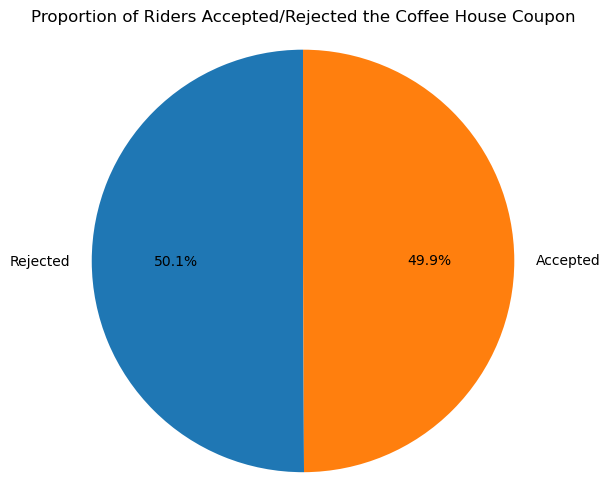

In [45]:
# Preparing data for pe charting to illustrate the proportion of accepted and rejected coupons
labels = ['Rejected', 'Accepted']
sizes = [2001, 1995]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title of the pie chart
plt.title('Proportion of Riders Accepted/Rejected the Coffee House Coupon')

# Display the pie chart
plt.show()

A total of 49.1% of respondents accepted the coffee house coupon. The acceptance rate for coffee house coupons is slightly higher compared to bar coupons, which had an acceptance rate of 41%.

#### 2.1 How does gender and age affect the acceptance of coffee house coupons? 

In [105]:
# Creating counts grouped by gender, age, Y (accepted/rejected)
counts1 = coffee_house.groupby(['gender','age','Y']).size().reset_index(name='Counts')
counts1['concatenated'] = counts1['gender'].str.cat(counts1['age'], sep='-')

# Reviewing the count1 result
print(counts1)

    gender      age  Y  Counts    concatenated
0   Female       21  0     183       Female-21
1   Female       21  1     224       Female-21
2   Female       26  0     196       Female-26
3   Female       26  1     220       Female-26
4   Female       31  0     186       Female-31
5   Female       31  1     179       Female-31
6   Female       36  0      93       Female-36
7   Female       36  1      82       Female-36
8   Female       41  0      96       Female-41
9   Female       41  1      89       Female-41
10  Female       46  0      63       Female-46
11  Female       46  1      48       Female-46
12  Female   50plus  0     193   Female-50plus
13  Female   50plus  1     139   Female-50plus
14  Female  below21  0      31  Female-below21
15  Female  below21  1      29  Female-below21
16    Male       21  0     237         Male-21
17    Male       21  1     239         Male-21
18    Male       26  0     213         Male-26
19    Male       26  1     214         Male-26
20    Male   

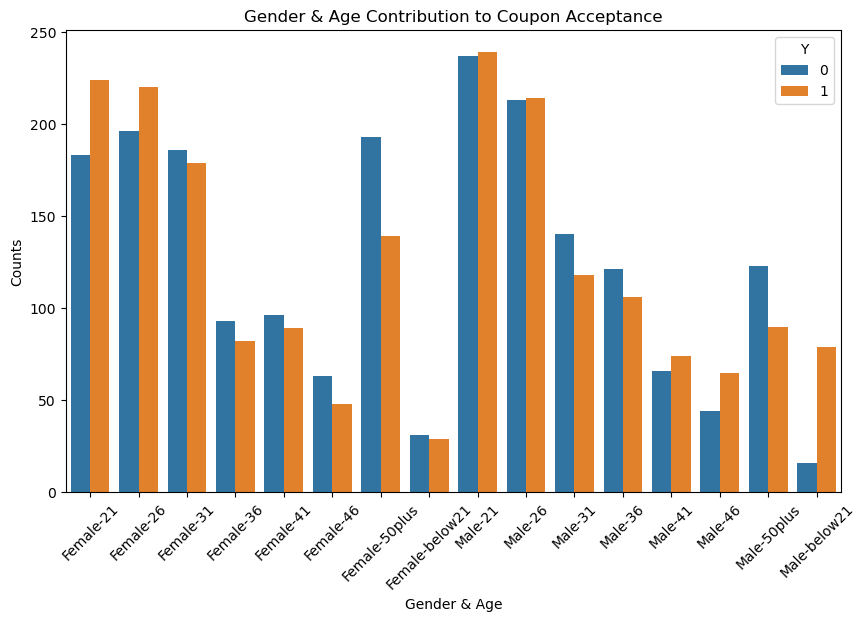

In [106]:
# Preparing seaborn barplot
plt.figure(figsize=(10, 6))

sns.barplot(x='concatenated',y='Counts',hue='Y',data=counts1)

# Add labels and title
plt.xlabel('Gender & Age')
plt.ylabel('Counts')
plt.title('Gender & Age Contribution to Coupon Acceptance')
plt.xticks(rotation=45)


# Show the plot
plt.show()

#### 3.1 Does destination and time of day affect the accepted coffee house coupon rate?

In [63]:
# Creating value counts to preview the distribution of the destination column
coffee_house['destination'].value_counts()

No Urgent Place    2155
Home                928
Work                913
Name: destination, dtype: int64

In [64]:
# Preparing data for the bar chart based on destination,time of the day, and acceptance rate

counts1 = coffee_house.groupby(['destination','time','Y']).size().reset_index(name='Counts')
sorted_counts = counts1.sort_values(by='Counts', ascending=False)
sorted_counts['concatenated'] = sorted_counts['time'].str.cat(sorted_counts['destination'], sep='-')

print(sorted_counts)

        destination  time  Y  Counts          concatenated
5   No Urgent Place  10AM  1     576  10AM-No Urgent Place
12             Work   7AM  0     506              7AM-Work
2              Home   6PM  0     454              6PM-Home
9   No Urgent Place   2PM  1     435   2PM-No Urgent Place
13             Work   7AM  1     407              7AM-Work
8   No Urgent Place   2PM  0     359   2PM-No Urgent Place
4   No Urgent Place  10AM  0     323  10AM-No Urgent Place
3              Home   6PM  1     281              6PM-Home
10  No Urgent Place   6PM  0     188   6PM-No Urgent Place
11  No Urgent Place   6PM  1     170   6PM-No Urgent Place
0              Home  10PM  0     138             10PM-Home
7   No Urgent Place  10PM  1      71  10PM-No Urgent Place
1              Home  10PM  1      55             10PM-Home
6   No Urgent Place  10PM  0      33  10PM-No Urgent Place


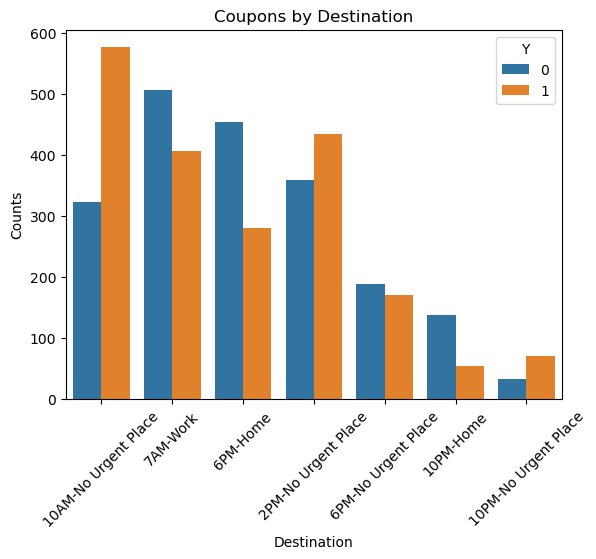

In [58]:
# Preparing seaborn barplot
sns.barplot(x='concatenated',y='Counts',hue='Y', data=sorted_counts)

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Counts')
plt.title('Coupons by Destination')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Overall, a higher number of drivers were presented with the coffee house coupon while en route to non-urgent destinations. Drivers are more likely to accept the coupon when driving to non-urgent places and more likely to reject it when driving to work or home. Among all accepted coffee house coupons, 63% were by drivers heading to non-urgent destinations.

Upon analyzing the data based on destination and time of day, it is evident that drivers exhibit a higher likelihood of accepting the coffee house coupon when en route to non-urgent destinations at 10 a.m. and 2 p.m. Conversely, they are less inclined to accept the coupon during their morning commute to work or at 6 p.m.commute back home.

#### 3.2 Do weather conditions and time of day affect coupon acceptance rate?

In [66]:
# Grouping by time of the day and the weather
counts2 = coffee_house.groupby(['time','weather','Y']).size().reset_index(name='Counts')

sorted_filtered_df = counts2.sort_values(by='Counts', ascending=False)

# Review the summary result
print(sorted_filtered_df)

    time weather  Y  Counts
18   6PM   Sunny  0     571
3   10AM   Sunny  1     513
22   7AM   Sunny  0     482
13   2PM   Sunny  1     420
19   6PM   Sunny  1     396
23   7AM   Sunny  1     346
12   2PM   Sunny  0     342
2   10AM   Sunny  0     293
9   10PM   Sunny  1      71
6   10PM   Snowy  0      70
4   10PM   Rainy  0      68
1   10AM   Rainy  1      63
21   7AM   Snowy  1      61
16   6PM   Snowy  0      61
17   6PM   Snowy  1      40
5   10PM   Rainy  1      40
8   10PM   Sunny  0      33
0   10AM   Rainy  0      30
20   7AM   Snowy  0      24
10   2PM   Snowy  0      17
7   10PM   Snowy  1      15
11   2PM   Snowy  1      15
15   6PM   Rainy  1      15
14   6PM   Rainy  0      10


In [67]:
# Concatinate two string columns for clear charting
sorted_filtered_df['concatenated'] = sorted_filtered_df['time'].str.cat(sorted_filtered_df['weather'], sep='-')

In [68]:
sorted_filtered_df.head(5)

,time,weather,Y,Counts,concatenated
18,6PM,Sunny,0,571,6PM-Sunny
3,10AM,Sunny,1,513,10AM-Sunny
22,7AM,Sunny,0,482,7AM-Sunny
13,2PM,Sunny,1,420,2PM-Sunny
19,6PM,Sunny,1,396,6PM-Sunny


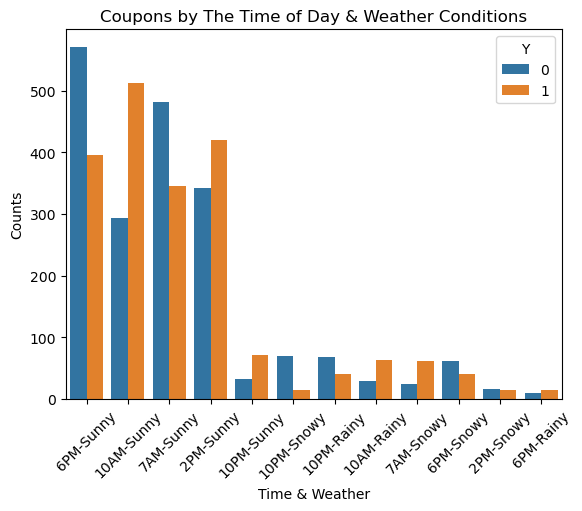

In [69]:
# Preparing seaborn barplot

sns.barplot(x='concatenated',y='Counts',hue='Y', data=sorted_filtered_df)

# Add labels and title
plt.xlabel('Time & Weather')
plt.ylabel('Counts')
plt.title('Coupons by The Time of Day & Weather Conditions')
plt.xticks(rotation=45)

# Show the plot
plt.show()

As anticipated, the data indicates higher acceptance rates for coupons when the weather is sunny. However, for coffee house coupons, the time of day remains a critical decision factor. Overall, there is an increased number of accepted coupons on sunny days, with the proportion of accepted versus rejected coupons significantly favoring acceptance at 10 a.m. and 2 p.m. Additionally, the time of day is also a crucial factor in coupon acceptance on both snowy and rainy days.

#### 4.1 What is the relationship between direction, coupon duration, & acceptance rate? 

In [95]:
counts3 = coffee_house.groupby(['direction_same','expiration','Y']).size().reset_index(name='Counts')

# Replace 'value2' with 'new_value' in 'Column1'
counts3['direction_same'] = counts3['direction_same'].replace(0, 'Same_Dir_No')
counts3['direction_same'] = counts3['direction_same'].replace(1, 'Same_Dir_Yes')

# Concatinate two string columns for clear charting
counts3['concatenated'] = counts3['direction_same'].str.cat(counts3['expiration'], sep='_')

# Rename direction column
counts3.rename(columns={'direction_same': 'direction'}, inplace=True)

counts3.head(10)

,direction,expiration,Y,Counts,concatenated
0,Same_Dir_No,1d,0,570,Same_Dir_No_1d
1,Same_Dir_No,1d,1,782,Same_Dir_No_1d
2,Same_Dir_No,2h,0,1079,Same_Dir_No_2h
3,Same_Dir_No,2h,1,815,Same_Dir_No_2h
4,Same_Dir_Yes,1d,0,166,Same_Dir_Yes_1d
5,Same_Dir_Yes,1d,1,251,Same_Dir_Yes_1d
6,Same_Dir_Yes,2h,0,186,Same_Dir_Yes_2h
7,Same_Dir_Yes,2h,1,147,Same_Dir_Yes_2h


In [96]:
counts4 = coffee_house.groupby(['direction_opp','expiration','Y']).size().reset_index(name='Counts')

# Replace 'value2' with 'new_value' in 'Column1'
counts4['direction_opp'] = counts4['direction_opp'].replace(0, 'Opp_Dir_No')
counts4['direction_opp'] = counts4['direction_opp'].replace(1, 'Opp_Dir_Yes')

# Concatinate two string columns for clear charting
counts4['concatenated'] = counts4['direction_opp'].str.cat(counts4['expiration'], sep='_')

# Rename direction column
counts4.rename(columns={'direction_opp': 'direction'}, inplace=True)


counts4.head(10)

,direction,expiration,Y,Counts,concatenated
0,Opp_Dir_No,1d,0,166,Opp_Dir_No_1d
1,Opp_Dir_No,1d,1,251,Opp_Dir_No_1d
2,Opp_Dir_No,2h,0,186,Opp_Dir_No_2h
3,Opp_Dir_No,2h,1,147,Opp_Dir_No_2h
4,Opp_Dir_Yes,1d,0,570,Opp_Dir_Yes_1d
5,Opp_Dir_Yes,1d,1,782,Opp_Dir_Yes_1d
6,Opp_Dir_Yes,2h,0,1079,Opp_Dir_Yes_2h
7,Opp_Dir_Yes,2h,1,815,Opp_Dir_Yes_2h


In [97]:
# Union the DataFrames
df_union = pd.concat([counts3, counts4], ignore_index=True)

print(df_union)

       direction expiration  Y  Counts     concatenated
0    Same_Dir_No         1d  0     570   Same_Dir_No_1d
1    Same_Dir_No         1d  1     782   Same_Dir_No_1d
2    Same_Dir_No         2h  0    1079   Same_Dir_No_2h
3    Same_Dir_No         2h  1     815   Same_Dir_No_2h
4   Same_Dir_Yes         1d  0     166  Same_Dir_Yes_1d
5   Same_Dir_Yes         1d  1     251  Same_Dir_Yes_1d
6   Same_Dir_Yes         2h  0     186  Same_Dir_Yes_2h
7   Same_Dir_Yes         2h  1     147  Same_Dir_Yes_2h
8     Opp_Dir_No         1d  0     166    Opp_Dir_No_1d
9     Opp_Dir_No         1d  1     251    Opp_Dir_No_1d
10    Opp_Dir_No         2h  0     186    Opp_Dir_No_2h
11    Opp_Dir_No         2h  1     147    Opp_Dir_No_2h
12   Opp_Dir_Yes         1d  0     570   Opp_Dir_Yes_1d
13   Opp_Dir_Yes         1d  1     782   Opp_Dir_Yes_1d
14   Opp_Dir_Yes         2h  0    1079   Opp_Dir_Yes_2h
15   Opp_Dir_Yes         2h  1     815   Opp_Dir_Yes_2h


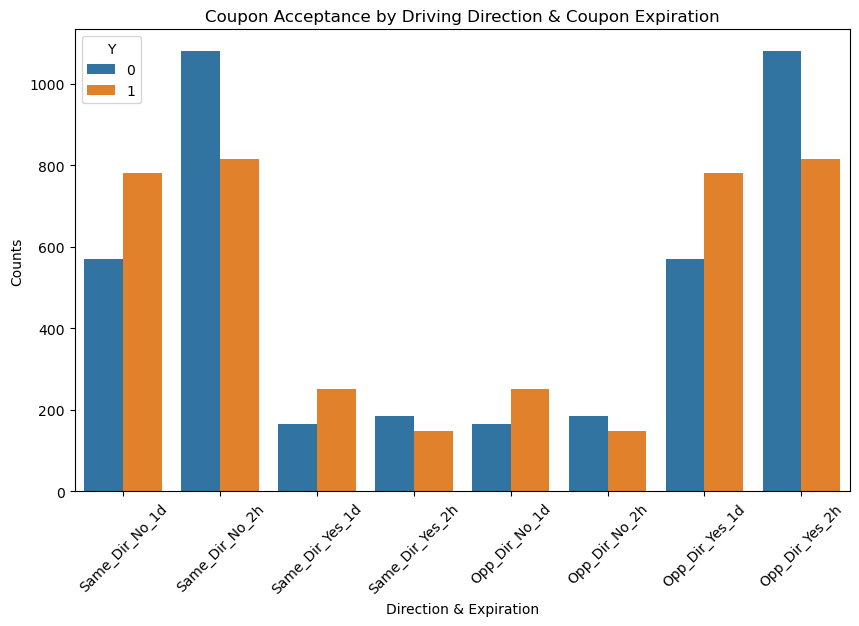

In [100]:
# Preparing seaborn barplot
plt.figure(figsize=(10, 6))

# Preparing seaborn barplot
sns.barplot(x='concatenated',y='Counts',hue='Y', data=df_union)

# Add labels and title
plt.xlabel('Direction & Expiration')
plt.ylabel('Counts')
plt.title('Coupon Acceptance by Driving Direction & Coupon Expiration')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Regardless of direction, coupons that expire in one day are accepted more frequently than those that expire in two hours.

## Findings Summary:

#### 1.1 How does the coffee house coupon acceptance rate compare to the bar coupon acceptance rate?

A total of 49.1% of respondents accepted the coffee house coupon. The acceptance rate for coffee house coupons is slightly higher compared to bar coupons, which had an acceptance rate of 41%.

#### 2.1 How do gender and age affect the acceptance of coffee house coupons?

Through analysis of the barplot presented earlier, it becomes evident that females aged below 26 exhibit higher acceptance rates compared to males within the same age bracket. Conversely, both females and males aged 50 and above display the lowest coffee house coupon acceptance rates. In the context of analyzing gender, age, and acceptance rate, age emerges as the more pivotal feature, overshadowing gender's influence.

#### 3.1 Do destination and time of day affect the accepted coffee house coupon rate?

Overall, a higher number of drivers were presented with the coffee house coupon while en route to non-urgent destinations. Drivers are more likely to accept the coupon when driving to non-urgent places and more likely to reject it when driving to work or home. Among all accepted coffee house coupons, 63% were by drivers heading to non-urgent destinations.

Upon analyzing the data based on destination and time of day, it is evident that drivers exhibit a higher likelihood of accepting the coffee house coupon when en route to non-urgent destinations at 10 a.m. and 2 p.m. Conversely, they are less inclined to accept the coupon during their morning commute to work or at 6 p.m.commute back home.

#### 3.2 How does the weather and the time of the day affect coupon acceptance rate?

As anticipated, the data indicates higher acceptance rates for coupons when the weather is sunny. However, for coffee house coupons, the time of day remains a critical decision factor. Overall, there is an increased number of accepted coupons on sunny days, with the proportion of accepted versus rejected coupons significantly favoring acceptance at 10 a.m. and 2 p.m. Additionally, the time of day is also a crucial factor in coupon acceptance on both snowy and rainy days.

#### 4.1 What is the relationship between direction, coupon expiration, & acceptance rate? 

Regardless of direction, coupons that expire in one day are accepted more frequently than those that expire in two hours.
